In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def get_beta_hat(X, y):
    # Calcular beta_hat usando la fórmula de MCO: β = (X'X)^(-1)X'y
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta_hat

Con el dataset de automóviles del ejercicio anterior:
(a) Ajustar una regresión lineal múltiple de MPG en función de todas las variables.
(b) Hacer un gráfico de dispersión de los valores predichos versus los valores reales de MPG.
(c) Realizar la regresión con todas las variables, pero con regularización de Ridge y de Lasso.
Dividir el dataset en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)para elegir el mejor valor de 𝜆 para cada uno.

In [21]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
regresores = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

df = pd.read_csv('data/auto-mpg.data', sep=r'\s+', names=columns)
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [ ]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

df['horsepower'] = pd.to_numeric(df['horsepower'])

In [23]:
X = np.array(df[regresores].values, dtype=float)
y = np.array(df['mpg'].values, dtype=float)

X = np.column_stack((np.ones(X.shape[0]), X)) 

beta_hat = get_beta_hat(X, y)
print("Beta hat:", beta_hat)

Beta hat: [-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
 -6.79461791e-03  8.52732469e-02  7.53367180e-01]


In [28]:
y_pred = X @ beta_hat
residuos = y - y_pred

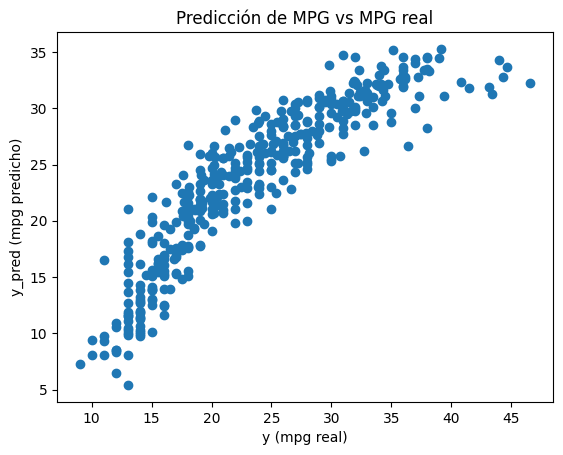

In [31]:
plt.scatter(y, y_pred)
plt.xlabel('y (mpg real)')
plt.ylabel('y_pred (mpg predicho)')
plt.title('Predicción de MPG vs MPG real')

plt.show()

Realizar la regresión con todas las variables, pero con regularización de Ridge y de Lasso.
Dividir el dataset en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
para elegir el mejor valor de 𝜆 para cada uno.

In [ ]:
#from sklearn.model_selection import train_test_split
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Definir posibles valores de alpha
alphas = [0.01, 0.1, 1, 10, 100]

# Ridge con validación cruzada (usa MSE por default)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred_ridge = ridge_cv.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge: mejor alpha =", ridge_cv.alpha_)
print("Ridge: MSE =", mse_ridge)
print("Ridge: R2 =", r2_ridge)


In [ ]:
from sklearn.linear_model import LassoCV

# Lasso con validación cruzada
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred_lasso = lasso_cv.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso: mejor alpha =", lasso_cv.alpha_)
print("Lasso: MSE =", mse_lasso)
print("Lasso: R2 =", r2_lasso)

In [ ]:
print("Coeficientes Lasso:", lasso_cv.coef_)
print("Coeficientes Ridge:", ridge_cv.coef_)